<a href="https://colab.research.google.com/github/uthours/Data-Processing-Visualization/blob/main/EXAM1CPSMA4313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXAM1
# Course: CPSMA 4313
# Uttam Subedi

First thing first, let's import the libraries

In [194]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tabulate import tabulate

Now, I will get authenticated with google cloud sandbox to access the public data set from big querry.

In [195]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


# 1. Gather the table on 8000 km mountains from the wikipedia page https://en.wikipedia.org/wiki/List of mountains by elevation

Now, I am authenticated let's play with the data. Let's look at the moutains by elevation from wikipidia. I am using a request library's get method to get the raw data from the passed URL.

In [196]:
rawData = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation#8,000_metres')
content = rawData.text
soup = BeautifulSoup(content,'lxml')

I have store the data as a pandas dataframe below. This is a great way to arrange data

In [198]:
tables = soup.find_all('table',class_="wikitable")[0]
df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


# b. Return only mountains in the ‘Himalayas

Here, I am printing only Himalayan ranges

In [199]:
df[df.Range == 'Himalayas']

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


# C. Barchart of the Ranges

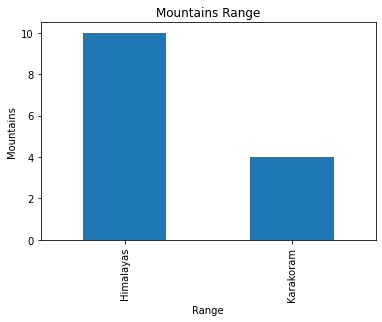

In [200]:
dfplot = df.groupby(['Range'])['Range'].count()
dfplot.plot(kind="bar", title = 'Mountains Range' , ylabel = 'Mountains', xlabel = 'Range')

#d. Create a box-plot of the height in Feet


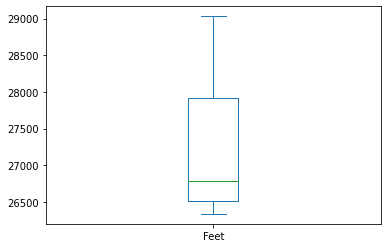

In [201]:
df.Feet.plot(kind = 'box')

#e. Report the mean, standard deviation and five number summary of the height in Feet

In [202]:
df.Feet.describe()

count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

#f. Report the mean and median of mountains when grouped by their Range.

In [203]:
mean = df.groupby('Range').mean()
median = df.groupby('Range').median()

print(tabulate(mean, headers=["Range", "mean"], tablefmt="fancy_grid"))

print(tabulate(median, headers=["Range", "median"], tablefmt="fancy_grid"))

╒═══════════╤═════════╤═════════╕
│           │   Range │    mean │
╞═══════════╪═════════╪═════════╡
│ Himalayas │ 8319.8  │ 27295.9 │
├───────────┼─────────┼─────────┤
│ Karakoram │ 8194.25 │ 26884   │
╘═══════════╧═════════╧═════════╛
╒═══════════╤═════════╤══════════╕
│           │   Range │   median │
╞═══════════╪═════════╪══════════╡
│ Himalayas │  8177.5 │  26829.5 │
├───────────┼─────────┼──────────┤
│ Karakoram │  8065.5 │  26461.5 │
╘═══════════╧═════════╧══════════╛


# 2. Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface

In [204]:
%%bigquery --project fabled-progress-338823
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


There were 198792903 rows are in the dataset.


#b.Here, I am calculating the average trip total based on payment type. I select the required columns and print its average which is grouped by payment type.

In [205]:
%%bigquery --project fabled-progress-338823
SELECT payment_type as payment_type, AVG(trip_total) as avg_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,avg_trip_total
0,Cash,12.265548
1,Dispute,15.496588
2,Pcard,10.116931
3,Prepaid,22.377662
4,Way2ride,16.639366
5,Split,18.788039
6,Unknown,17.649893
7,Mobile,20.339910
8,No Charge,15.836177
9,Credit Card,20.524892


# c. I am calculating the trips that had a non-zero recorded time above the average time

In [206]:
%%bigquery --project fabled-progress-338823 
SELECT COUNT(*) as no_of_non_zero_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds != 0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_time FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,no_of_non_zero_trips_above_avg_time
0,62143014


# 3. (10 points) Questions about the exam
(a) Approximately how long did you work on this exam?

Ans: It took me around 4-6 hours to complete this exam. Although it took me so long, I would say the exam was very intresting. 

(b) Which was the hardest and easiest topic from this section?

Ans: The hardest part was QNO. 2(c) to calculate the trips that had a non-zero recorded time, were above the average time. The easy part was question 2(a) and 2(b). The overall exam was very time consuming.

(c) Which method of gathering data are you most excited to use again

Ans: I am exicted to use all of them and I have also store libraries and other code to play around.

# References:
REFERENCES:

https://github.com/nurfnick/Data_Viz

https://github.com/uthours/Data-Processing-Visualization

https://stackoverflow.com/
